# 🫘 Dry Bean Dataset Analysis

## 🎯 Objective  
To gain a comprehensive understanding of the Dry Bean dataset's structure and characteristics, enabling the development of more effective and accurate machine learning models.

## 🔍 Goals
- Explore feature distributions and relationships
- Identify patterns and potential outliers
- Assess data quality (e.g., missing values, imbalances)
- Derive insights for preprocessing and feature selection

#### Importing Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [2]:
df = pd.read_csv("Dry_Bean_Dataset.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Dry Bean Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

- **Total Samples**: 13,611 dry bean instances  
- **Number of Features**: 16 numerical features describing physical properties of each bean  
- **Missing Values**: None — the dataset is complete and clean 🙌

## Class Distribution

In [4]:
df.groupby("Class").size()

Class
BARBUNYA    1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1928
SEKER       2027
SIRA        2636
dtype: int64

- **Number of Classes**: 7 distinct types of dry beans  
- **Class Imbalance**: The distribution of samples across classes is imbalanced  
- **Modeling Note**: Due to this imbalance, techniques such as resampling (e.g., SMOTE or undersampling), class weighting, or ensemble methods may be necessary to improve model performance.

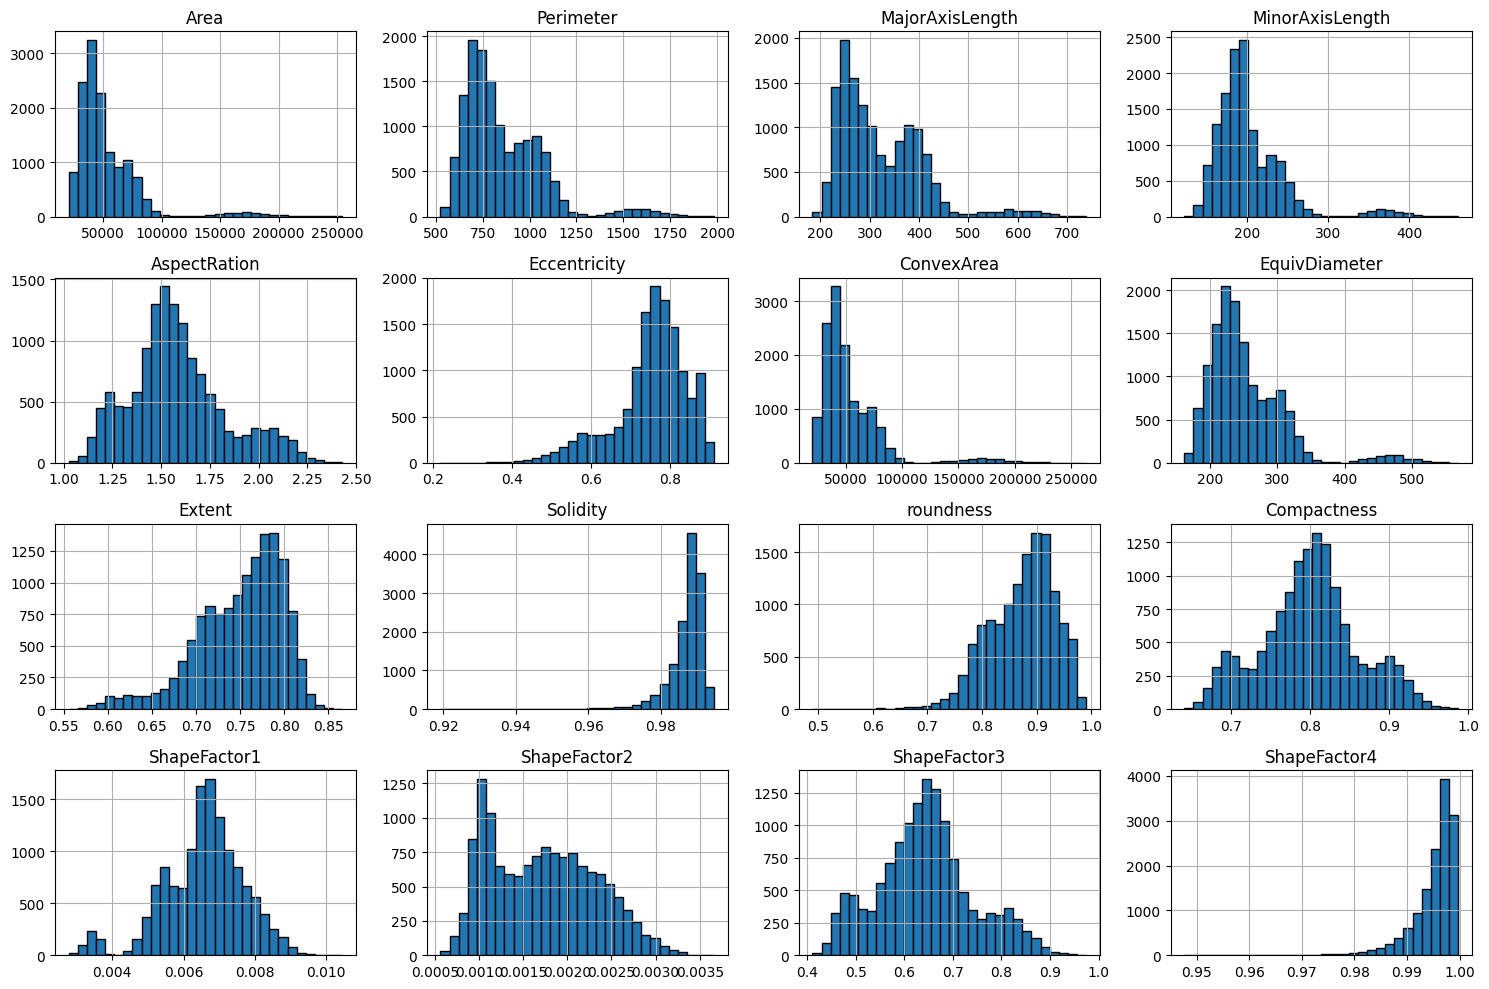

In [5]:
df.select_dtypes(include='number').hist(bins=30, figsize=(15, 10), edgecolor='black')

plt.tight_layout()
plt.show()

SEKER


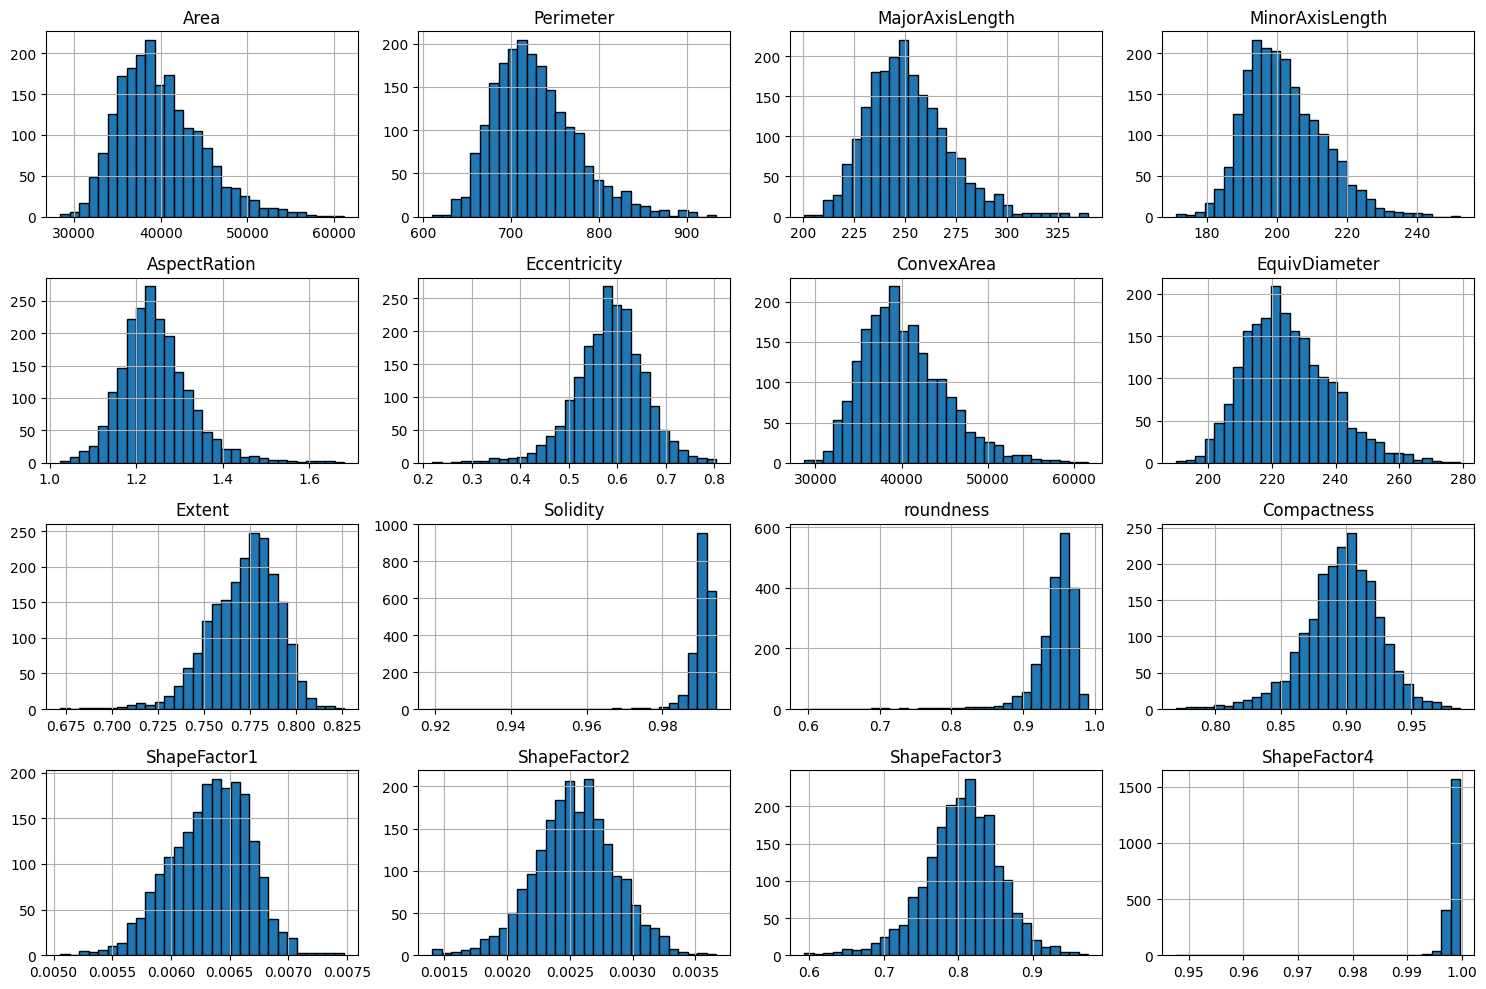

BARBUNYA


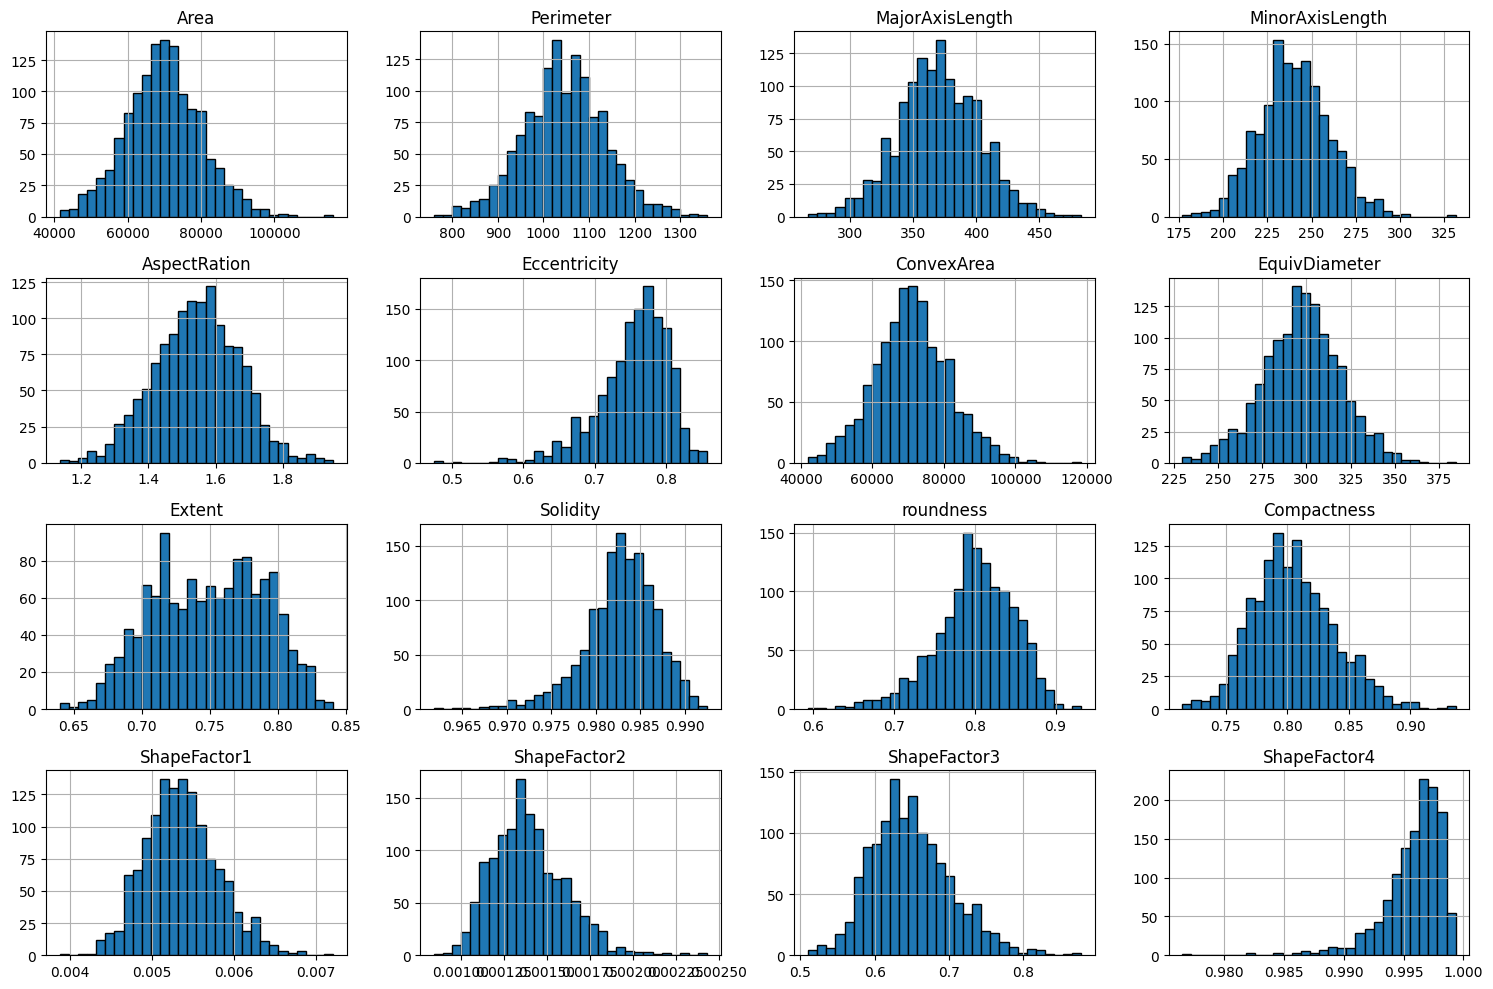

BOMBAY


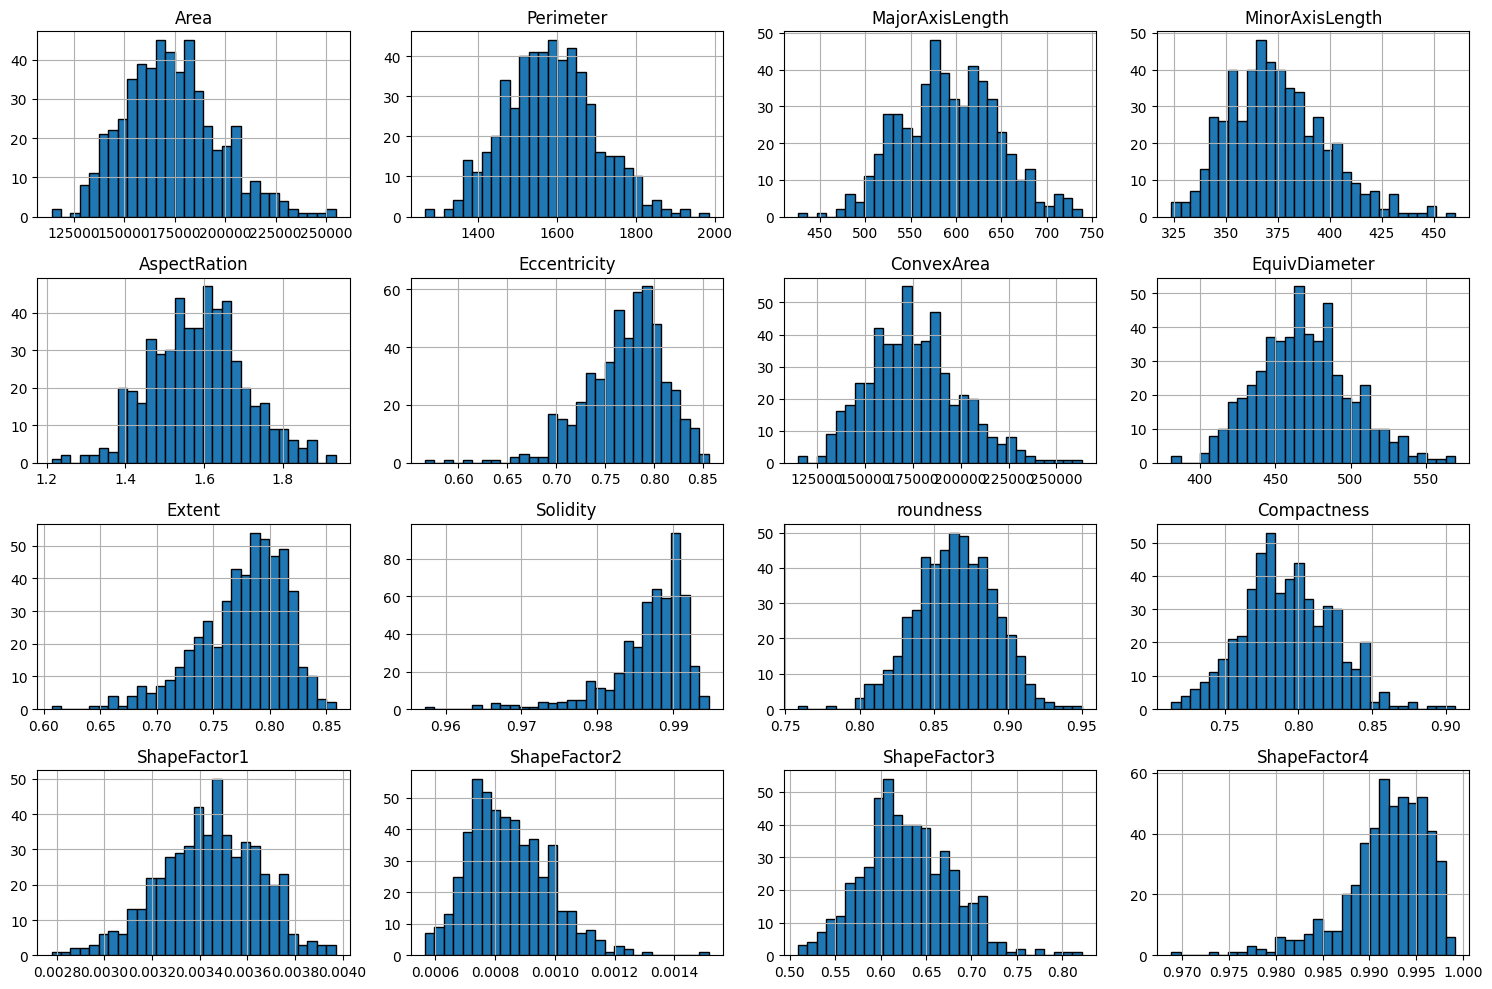

CALI


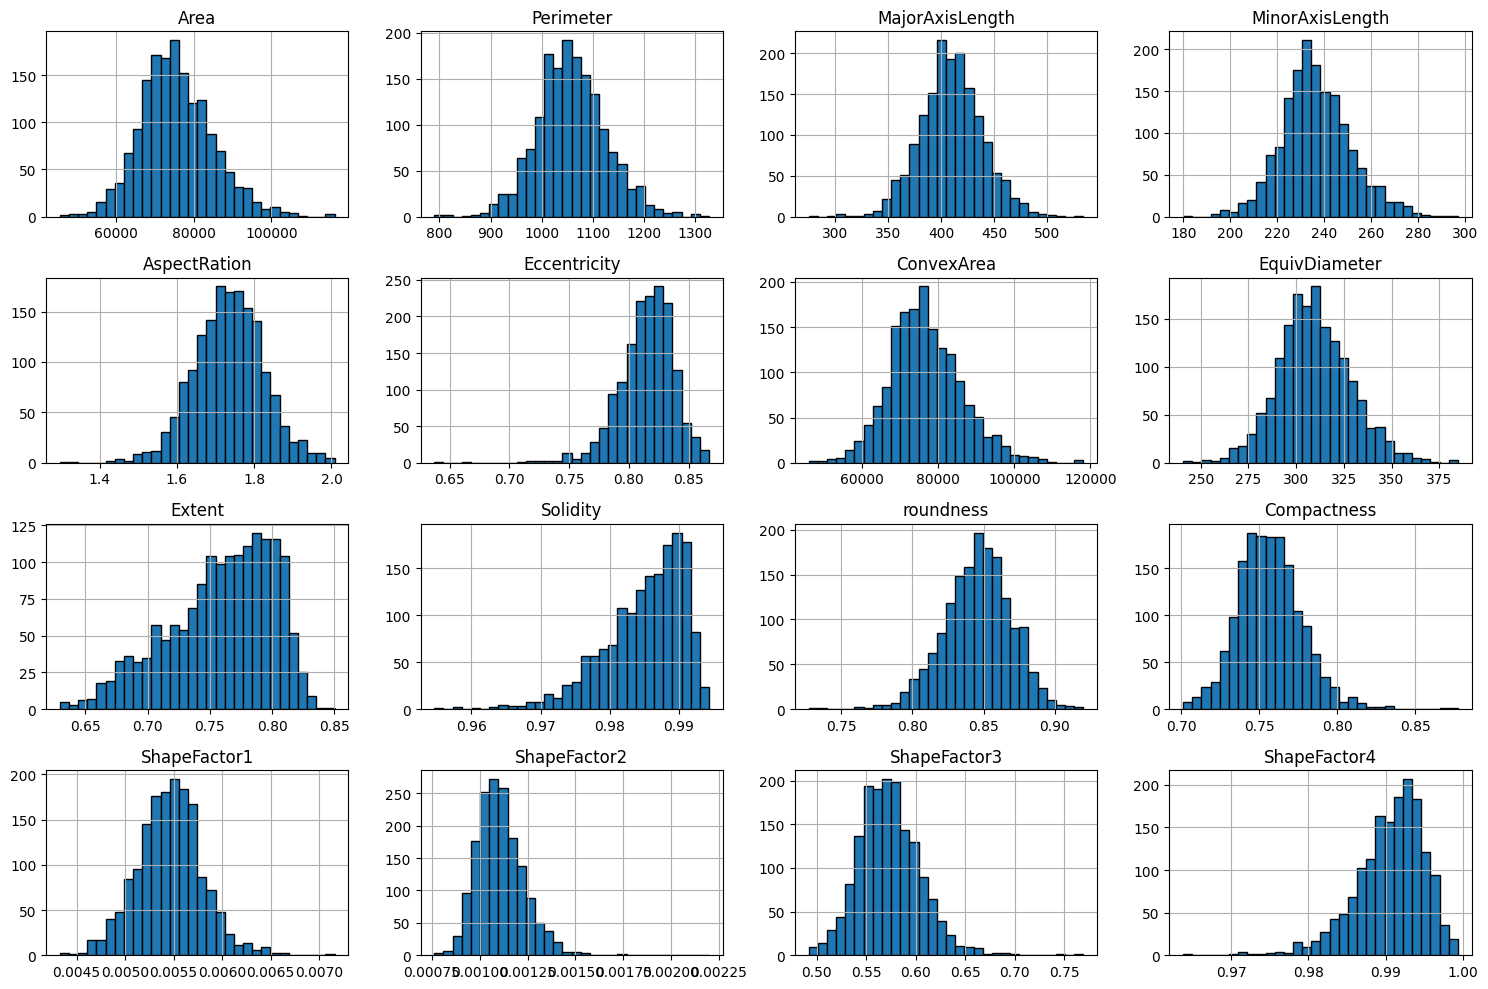

HOROZ


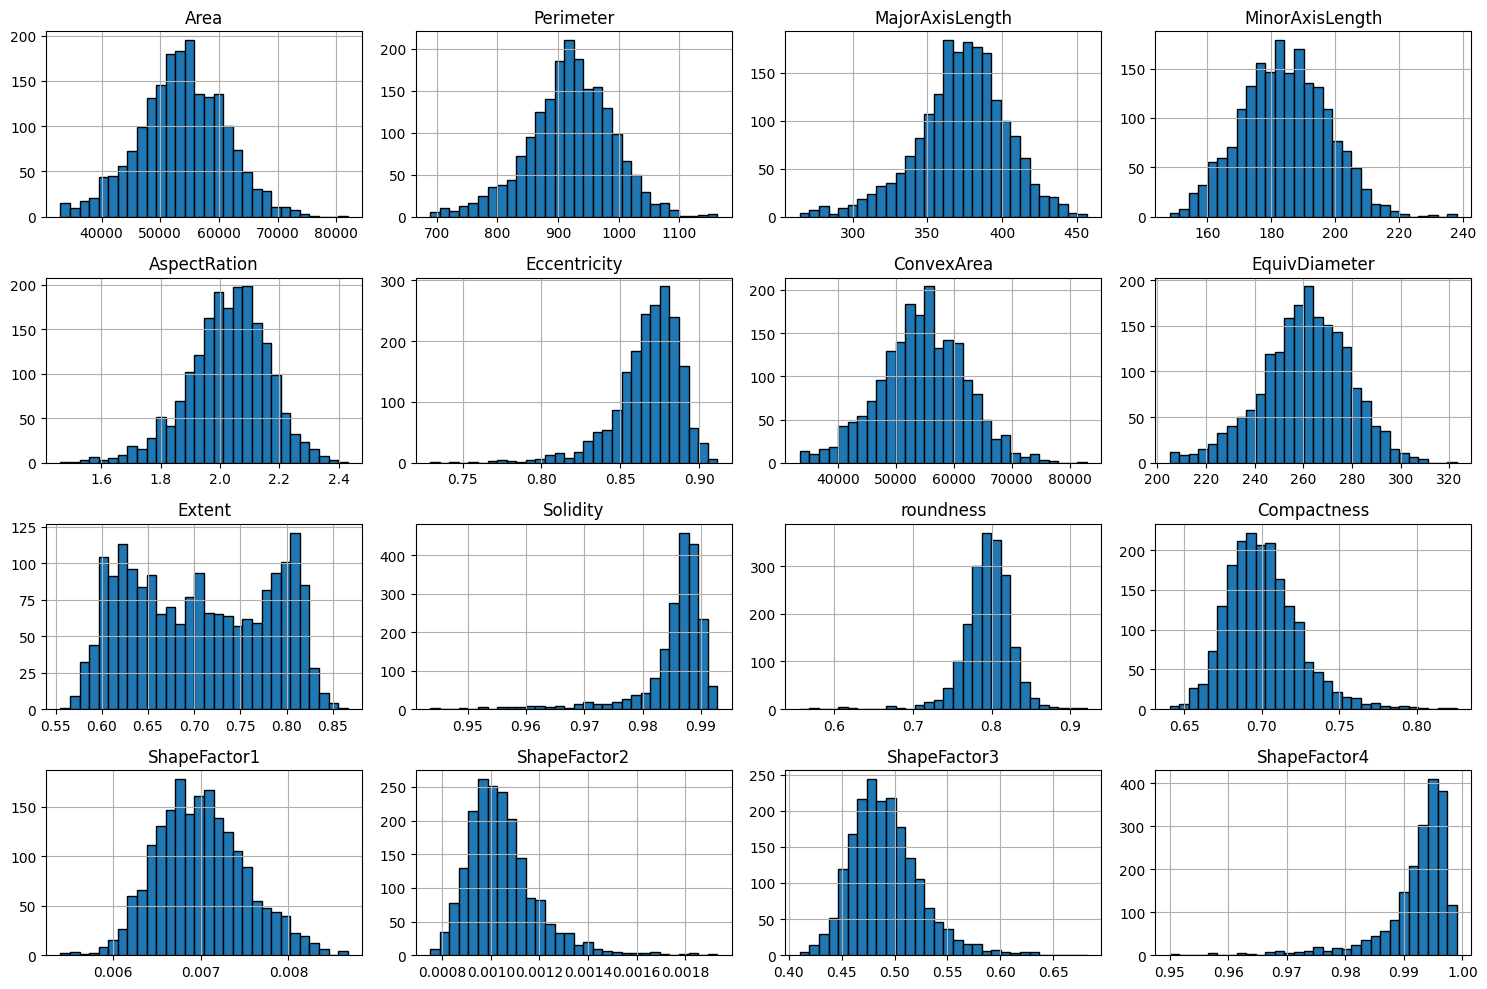

SIRA


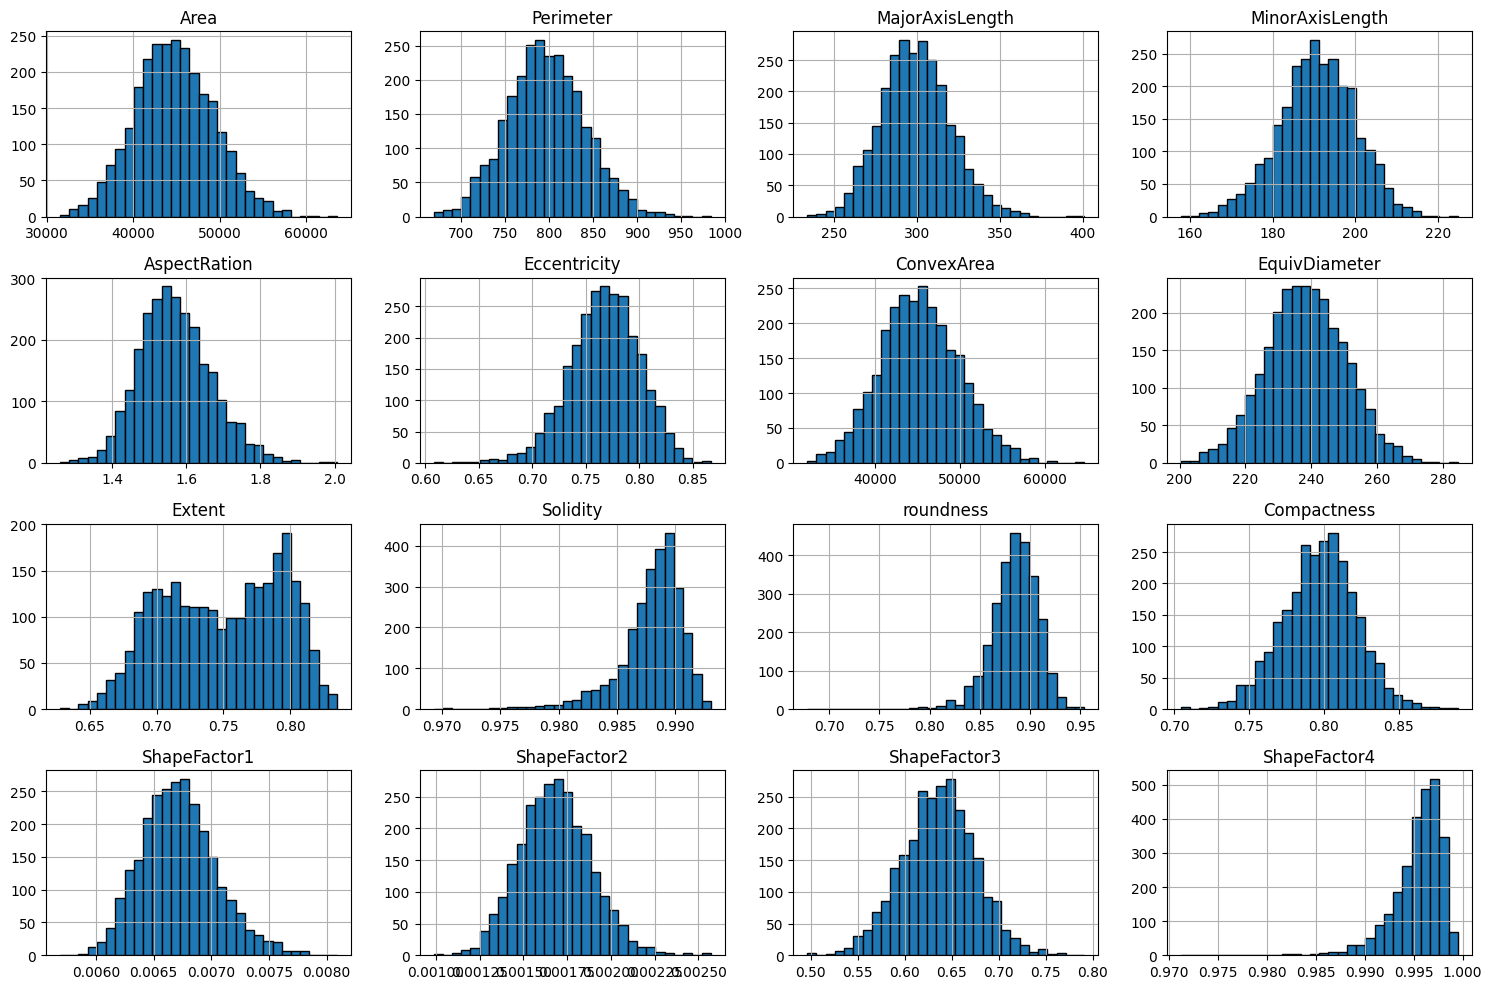

DERMASON


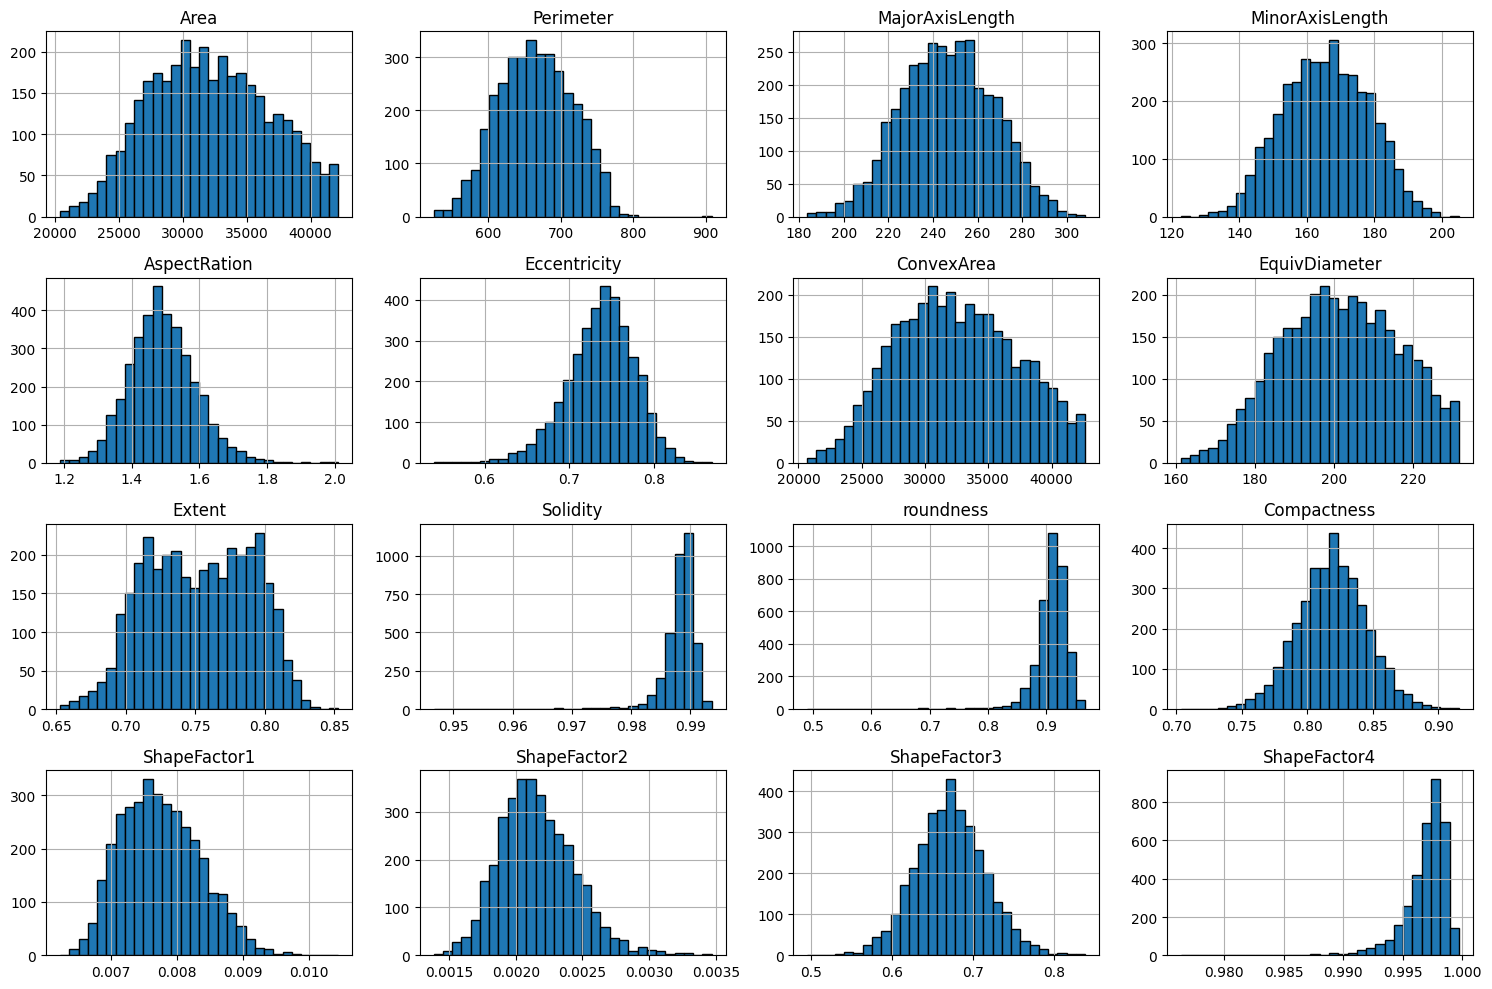

In [6]:
for bean_class in df['Class'].unique():
    class_data = df[df['Class'] == bean_class]
    class_data.select_dtypes(include='number').hist(bins=30, figsize=(15, 10), edgecolor='black')
    print(bean_class)
    plt.tight_layout()
    plt.show()

### Skewness in Features

Several features in the dataset exhibit significant skewness.  
For certain models — particularly those sensitive to feature distributions, such as **Logistic Regression**, **Linear Discriminant Analysis (LDA)**, and **Support Vector Machines (SVM)** — it is beneficial to address this skewness (e.g., via log transformation or Box-Cox transformation) to improve model performance and stability.

## Outliers in the Dataset

In [7]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("Number of outlier")

for bean_class in df['Class'].unique():
    class_data = df[df['Class'] == bean_class][numeric_cols]
    print(f"\n{bean_class}:")

    for col in numeric_cols:
        Q1 = class_data[col].quantile(0.25)
        Q3 = class_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = class_data[(class_data[col] < lower_bound) | (class_data[col] > upper_bound)][col]
        print(f"    {col}: {len(outliers)}")

Number of outlier

SEKER:
    Area: 37
    Perimeter: 39
    MajorAxisLength: 30
    MinorAxisLength: 23
    AspectRation: 61
    Eccentricity: 55
    ConvexArea: 37
    EquivDiameter: 28
    Extent: 31
    Solidity: 90
    roundness: 97
    Compactness: 54
    ShapeFactor1: 17
    ShapeFactor2: 32
    ShapeFactor3: 52
    ShapeFactor4: 98

BARBUNYA:
    Area: 12
    Perimeter: 20
    MajorAxisLength: 10
    MinorAxisLength: 10
    AspectRation: 11
    Eccentricity: 31
    ConvexArea: 12
    EquivDiameter: 13
    Extent: 0
    Solidity: 33
    roundness: 26
    Compactness: 15
    ShapeFactor1: 16
    ShapeFactor2: 18
    ShapeFactor3: 17
    ShapeFactor4: 54

BOMBAY:
    Area: 7
    Perimeter: 7
    MajorAxisLength: 1
    MinorAxisLength: 7
    AspectRation: 5
    Eccentricity: 7
    ConvexArea: 7
    EquivDiameter: 6
    Extent: 12
    Solidity: 27
    roundness: 4
    Compactness: 5
    ShapeFactor1: 2
    ShapeFactor2: 6
    ShapeFactor3: 5
    ShapeFactor4: 20

CALI:
    Area: 29


As observed, several features contain a few outliers.  
These outliers can negatively impact model performance, especially for models sensitive to feature scale and distribution (e.g., linear models or KNN).  
It is often beneficial to either **remove** these outliers or **replace them with the median** to ensure more robust and reliable modeling.

## Feature Correlation

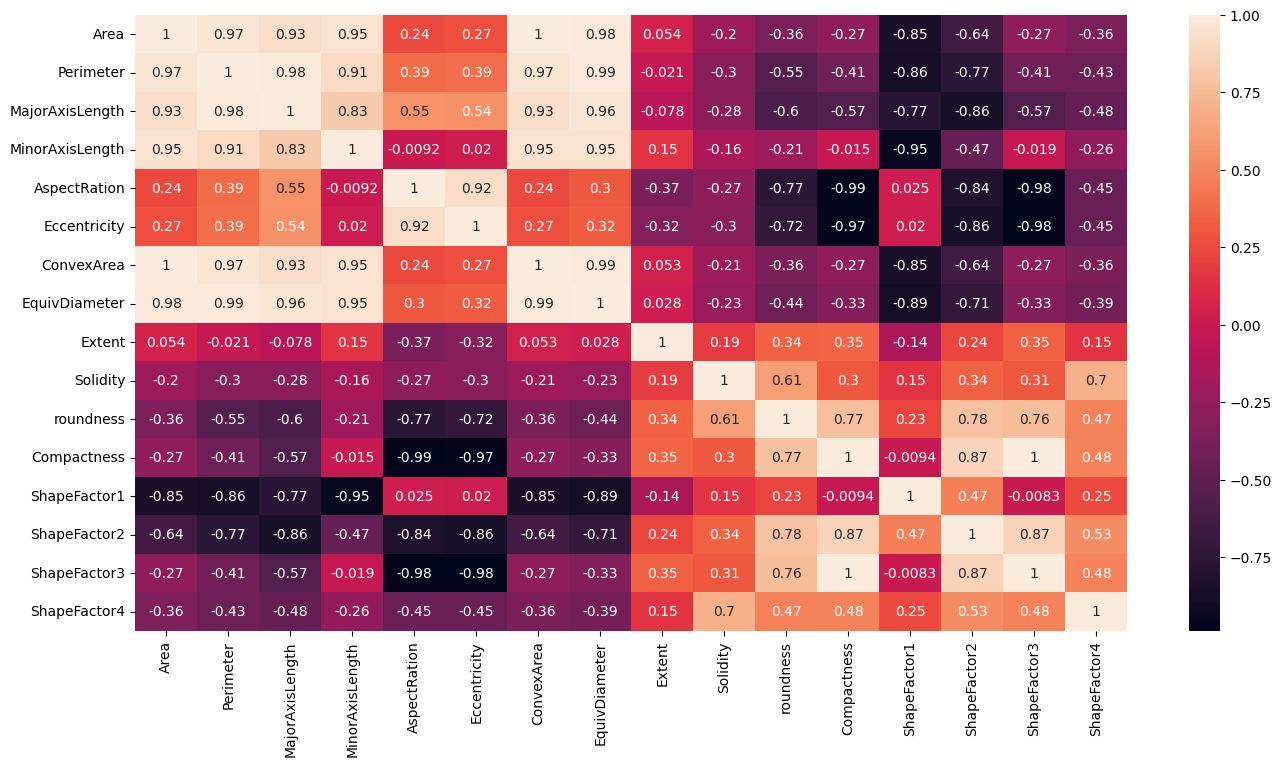

In [8]:
corr_matrix = df.drop(columns="Class").corr()
fig = plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Some features exhibit high correlation with one another, which may lead to **redundancy** in the dataset.  
This multicollinearity can negatively affect certain models (such as linear regression or logistic regression) by making them less stable or harder to interpret.  
In such cases, **feature selection** or **dimensionality reduction** techniques (e.g., PCA or removing highly correlated features) may be beneficial.


## Key Features for Class Separation

In [9]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns="Class")
y = df["Class"]
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

C:\Users\R.A.B\AppData\Local\Temp\ipykernel_17108\4124180947.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\R.A.B\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


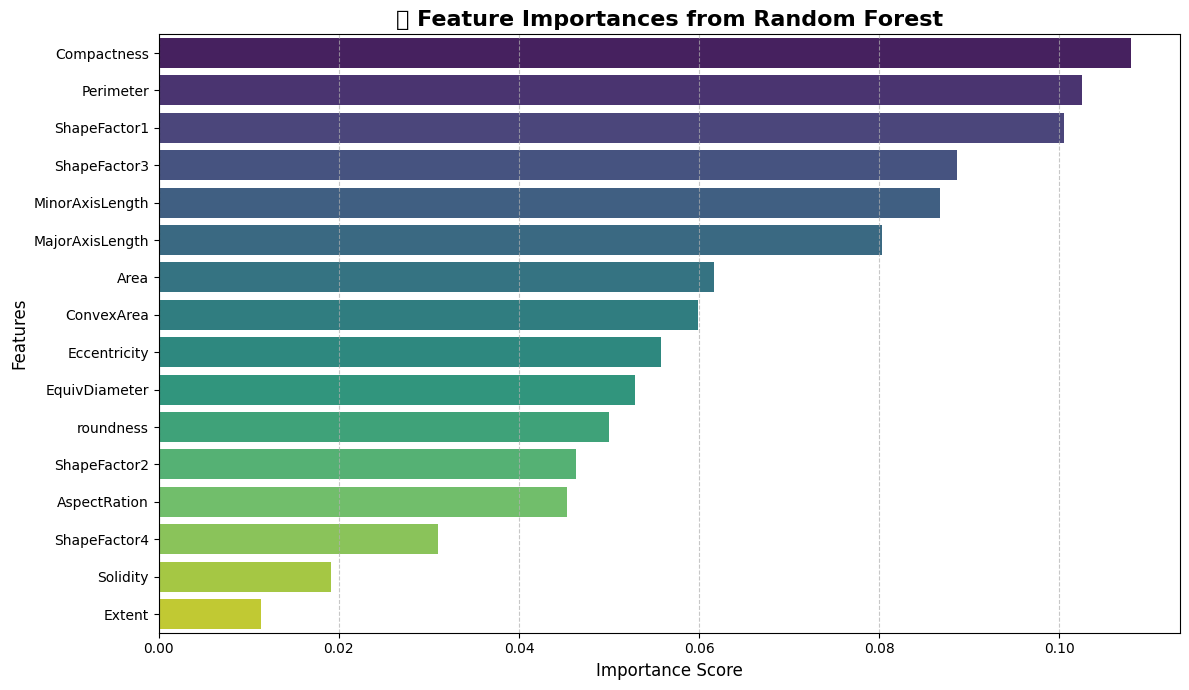

In [10]:
# Create a Series with feature names as index and importance scores as values
feature_importances = pd.Series(importances, index=X.columns)

# Sort by importance (descending)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot the top features
plt.figure(figsize=(12, 7))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index, hue=sorted_importances.index, palette="viridis")

plt.title('🔍 Feature Importances from Random Forest', fontsize=16, weight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


The features **Compactness** and **ShapeFactor1** have the highest impact in separating classes based on the Random Forest model.  
Additionally, they exhibit low correlation with each other, making them ideal candidates for visualizing class distributions in a 2D plot.

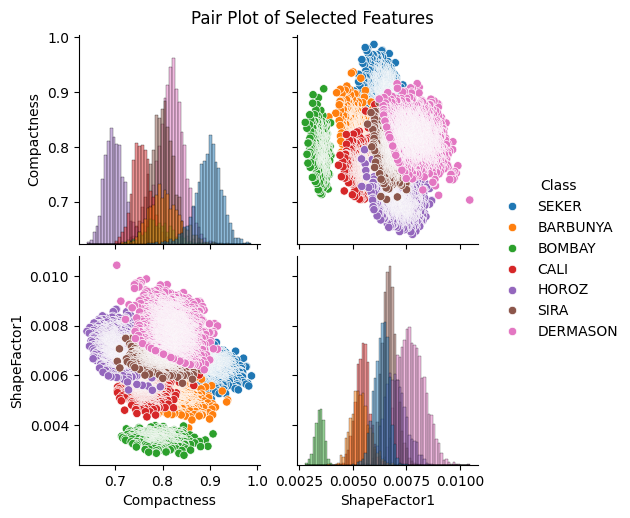

In [11]:
# انتخاب چند ویژگی کلیدی
selected_features = ['Compactness', 'ShapeFactor1', 'Class']
sns.pairplot(df[selected_features], hue='Class', diag_kind='hist')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

### Class Similarity Concern

Based on the plot, the **SIRA** and **DERMASON** classes appear very similar in feature space.  
This similarity may lead to confusion for classification models, increasing the likelihood of misclassifications between these two classes.